# 오디오 분류(Audio Classification)

* 가상 악기를 활용해 악기별 음색 데이터셋을 활용해 오디오 분류

1. 기존 데이터에서 분류에 사용되는 방법을 사용해 분류
2. 오디오 데이터에 특화된 분류

* 출처: https://bab2min.tistory.com/642

### 데이터 준비 및 전처리

In [1]:
!pip install librosa
!pip install matplotlib
!pip install keras
!pip install tensorflow
!pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!python -m pip install -U matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import numpy as np
import itertools
import librosa
import librosa.display
import IPython.display as ipd
import time
import matplotlib.pyplot as plt
#import tensorflow as tf
#from tensorflow import keras
plt.style.use('seaborn-white')

<ipython-input-3-0d50065fec12>:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


* 데이터를 저장할 리스트와 파일을 불러올 경로를 지정

* http://suanlab.com/datasets/GeneralMidi.wav



In [4]:
!wget http://suanlab.com/datasets/GeneralMidi.wav

--2023-05-10 07:13:23--  http://suanlab.com/datasets/GeneralMidi.wav
Resolving suanlab.com (suanlab.com)... 52.219.144.72
Connecting to suanlab.com (suanlab.com)|52.219.144.72|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3409459756 (3.2G) [audio/wav]
Saving to: ‘GeneralMidi.wav’

GeneralMidi.wav     100%[===================>]   3.17G  32.2MB/s    in 1m 42s  

2023-05-10 07:15:05 (32.0 MB/s) - ‘GeneralMidi.wav’ saved [3409459756/3409459756]



In [5]:
midi_file = './GeneralMidi.wav'

* wmv 파일에는 128개 악기와 46개 타악기의 음을 50개씩 2초 간격으로 존재
* 해당 예제에서는 일부 악기만 선택해서 사용

In [6]:
instruments = [0,10,20,30,40,50,60,70,80,90]
num_notes = 50
sec = 2

audio = []
inst = []

for inst_idx, note in itertools.product(range(len(instruments)),range(num_notes)):
    instrument = instruments[inst_idx]
    offset = (instrument*num_notes*sec) + (note*sec)
    print('instrument: {}, note: {}, offset: {}'.format(instrument,note,offset))
    y, sr = librosa.load(midi_file, sr=None,offset=offset, duration=2.0)
    audio.append(y)
    inst.append(inst_idx)

instrument: 0, note: 0, offset: 0
instrument: 0, note: 1, offset: 2
instrument: 0, note: 2, offset: 4
instrument: 0, note: 3, offset: 6
instrument: 0, note: 4, offset: 8
instrument: 0, note: 5, offset: 10
instrument: 0, note: 6, offset: 12
instrument: 0, note: 7, offset: 14
instrument: 0, note: 8, offset: 16
instrument: 0, note: 9, offset: 18
instrument: 0, note: 10, offset: 20
instrument: 0, note: 11, offset: 22
instrument: 0, note: 12, offset: 24
instrument: 0, note: 13, offset: 26
instrument: 0, note: 14, offset: 28
instrument: 0, note: 15, offset: 30
instrument: 0, note: 16, offset: 32
instrument: 0, note: 17, offset: 34
instrument: 0, note: 18, offset: 36
instrument: 0, note: 19, offset: 38
instrument: 0, note: 20, offset: 40
instrument: 0, note: 21, offset: 42
instrument: 0, note: 22, offset: 44
instrument: 0, note: 23, offset: 46
instrument: 0, note: 24, offset: 48
instrument: 0, note: 25, offset: 50
instrument: 0, note: 26, offset: 52
instrument: 0, note: 27, offset: 54
instrum

In [80]:
import numpy as np
audio_np = np.array(audio,np.float32)
inst_np = np.array(inst,np.int16)
print(audio_np.shape, inst_np.shape)

(500, 88200) (500,)


In [79]:
print(audio[0])
print(inst[0])
print(audio_np[0])
print(inst_np[0])


[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -3.0517578e-05
 -3.0517578e-05 -3.0517578e-05]
0
[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -3.0517578e-05
 -3.0517578e-05 -3.0517578e-05]
0


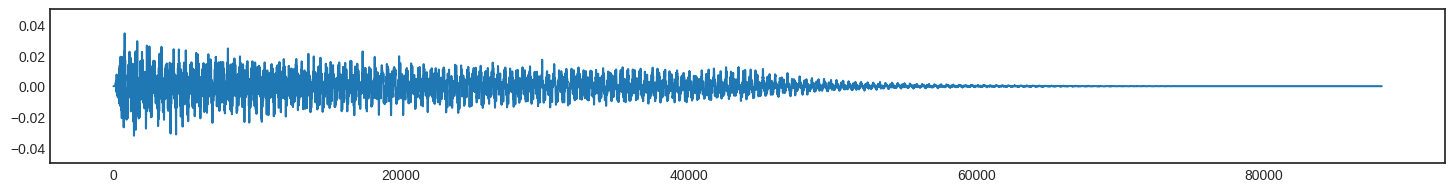

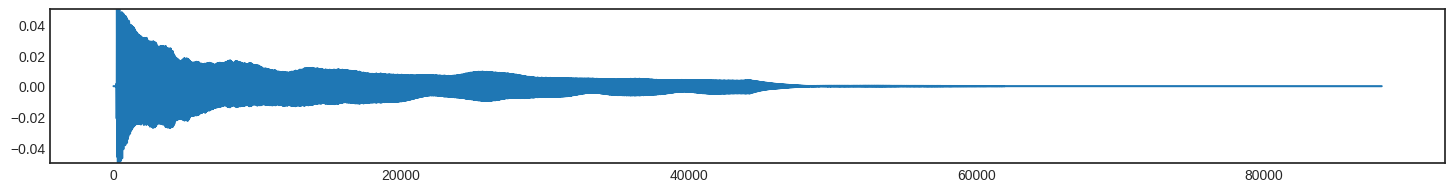

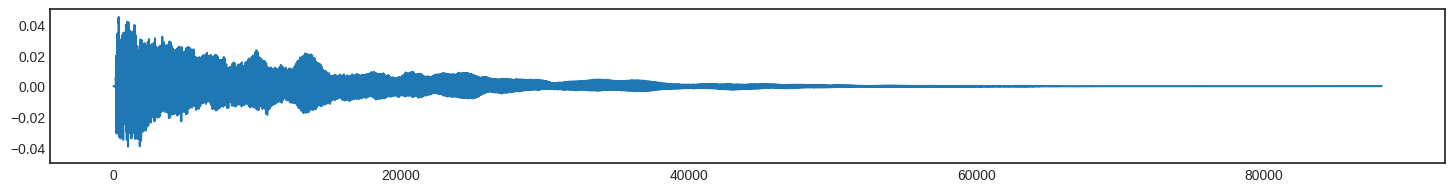

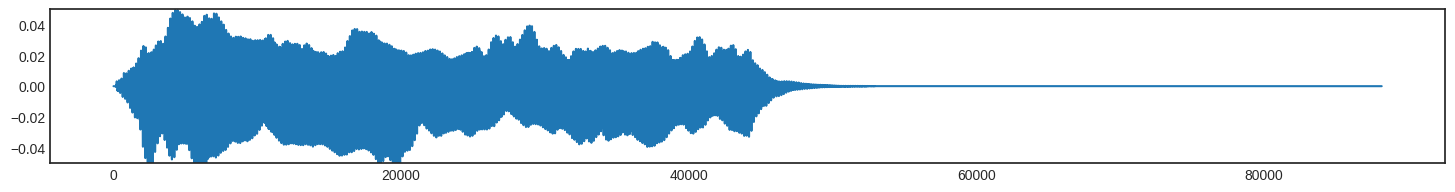

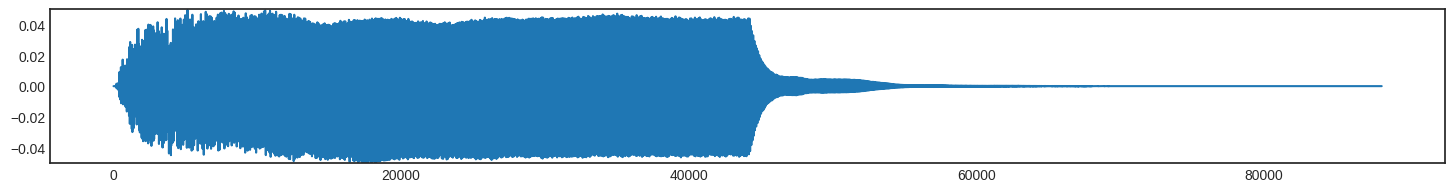

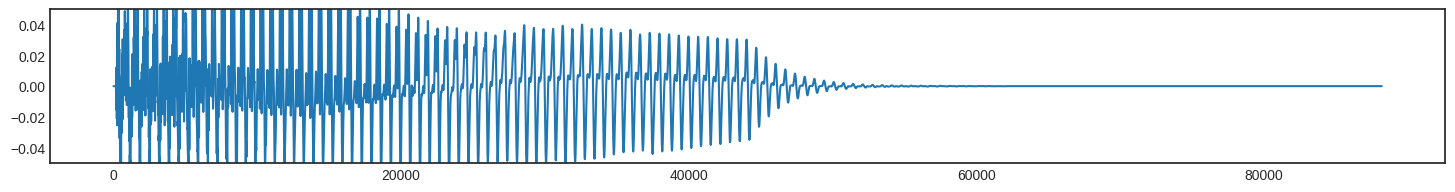

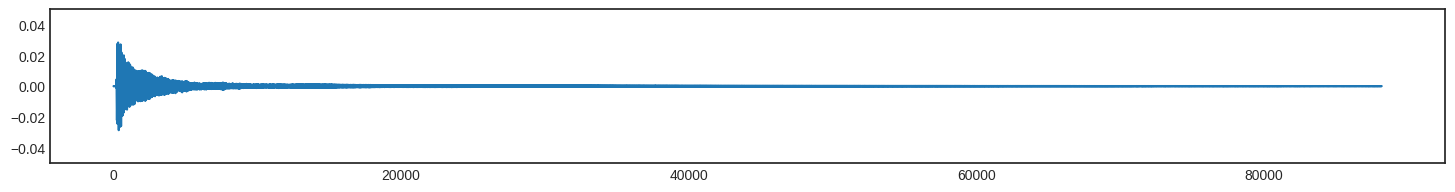

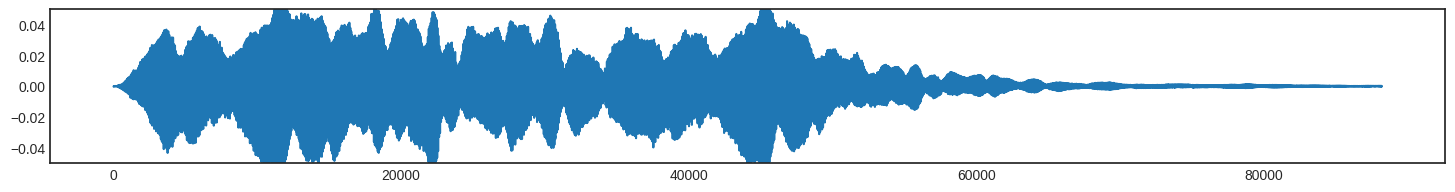

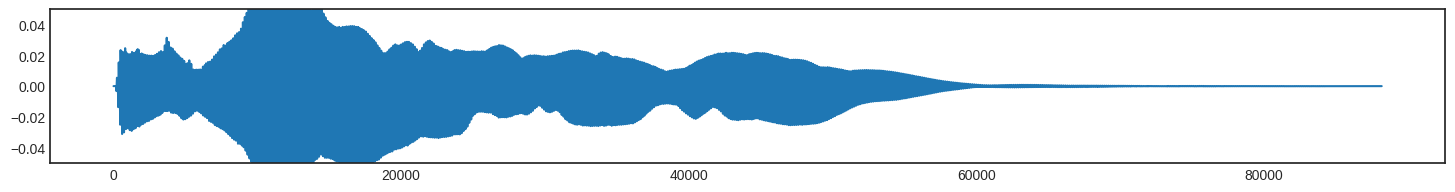

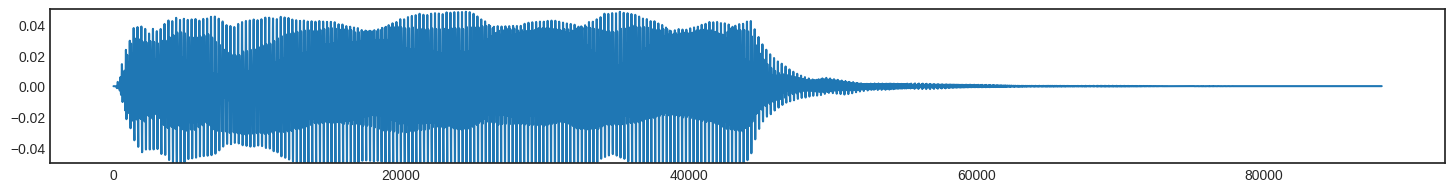

In [8]:
for idx in range(0,len(audio_np),num_notes):
    plt.figure(figsize=(18,2))
    plt.plot(audio_np[idx])
    plt.ylim((-0.05,0.05))
    plt.show()

In [9]:
print(inst_np[0])
ipd.Audio(audio_np[0],rate=sr)

0


In [10]:
print(inst_np[50])
ipd.Audio(audio_np[50],rate=sr)

1


In [11]:
print(inst_np[100])
ipd.Audio(audio_np[100],rate=sr)

2


In [12]:
print(inst_np[150])
ipd.Audio(audio_np[150],rate=sr)

3


In [13]:
print(inst_np[200])
ipd.Audio(audio_np[200],rate=sr)

4


In [14]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(audio_np)

MinMaxScaler()

## 머신러닝을 이용한 오디오 분류

* 학습 데이터와 실험 데이터를 분리

In [15]:
from sklearn.model_selection import train_test_split

train_x,test_x,train_y,test_y = train_test_split(audio_np,inst_np,test_size=0.2)

print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(400, 88200)
(100, 88200)
(400,)
(100,)


### Logistic Regression

* Logistic Regression은 특성상 다중 분류에는 적합하지 않음

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

LR = LogisticRegression()
LR.fit(train_x,train_y)
pred = LR.predict(test_x)
acc = accuracy_score(pred,test_y)
print(acc) # 5%의 accuracy

0.04


### Support Vector Machine

In [17]:
from sklearn import svm

SVM = svm.SVC(kernel='linear')
SVM.fit(train_x,train_y)
pred = SVM.predict(test_x)
acc = accuracy_score(pred,test_y)
print(acc) # 4%의 accuracy => 유튜브에는 0.03이 나옴

0.04


### Decision Tree

In [18]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(train_x,train_y)
pred = DT.predict(test_x)
acc = accuracy_score(pred,test_y)
print(acc) # 34%의 accuracy => 유튜브에는 0.31이 나옴


0.25


### 결과가 잘 안나오는 이유

데이터가 매우 길기 때문에 잘 처리하지 못함

## Constant-Q를 이용한 머신러닝 오디오 분류

### 데이터 준비

* wav는 매 순간의 음압을 측정하여 그 수치를 저장한 형태이기 때문에 그 자체로 음악을 분석하기에 적합하지 않음 (음의 높이와 세기를 듣는것이지 순간의 음압을 듣는게 아니기 때문)
* 푸리에 변환과 같은 변환 기법을 이용하여 시간 축의 데이터를 주파수 축의 데이터로 바꿔줘야할 필요가 있음
* 푸리에 변환 대신 푸리에 변환과 유사한 Constant-Q 변환을 사용
* Constant-Q 변환은 주파수 축이 로그 단위로 변환되고, 각 주파수에 따라 해상도가 다양하게 처리되기 때문에(저주파는 저해상도, 고주파는 고해상도) 음악을 처리하는 데에 푸리에 변환보다 유리

*   주파수 대역을 저장할 리스트 `audio_cqt` 선언
*   constant-Q 변환할 때는 변환할 오디오 데이터와 sampling rate가 필요
*   해당 데이터에서는 sampling rate가 모두 동일하므로 따로 처리가 필요하지 않음
*   여기서는 Constant-Q 변환을 사용해 오디오 데이터를 주파수 대역으로 변환




*   변환에는 앞서 준비한 데이터를 가져와 사용하며, Constant-Q 변환에는 `librosa.cqt` 함수를 사용
*   여기서 `n_bins`는 옥타브 단계 및 개수를, `bins_per_octave`는 한 옥타브가 가지는 단계를 의미
*   라벨에 대해선 원 핫 인코딩을 적용



In [19]:
audio_cqt = []
for y in audio:
    ret = librosa.cqt(y,hop_length=1024, n_bins=24*7,bins_per_octave=24)
    #유튜브코드 librosa.cqt(y,sr,hop_length=1024, n_bins=24*7,bins_per_octave=24)
    ret = np.abs(ret)
    audio_cqt.append(ret)
    

* 앞서 생성한 주파수 대역을 spectrogram으로 시각화
* 악기 간 spectrogram을 비교해보면 차이가 존재함을 알 수 있음

<ipython-input-20-e58aa036fa19>:3: UserWarning: Frequency axis exceeds Nyquist. Did you remember to set all spectrogram parameters in specshow?
  librosa.display.specshow(amp_db,sr=sr,x_axis='time',y_axis='cqt_note')


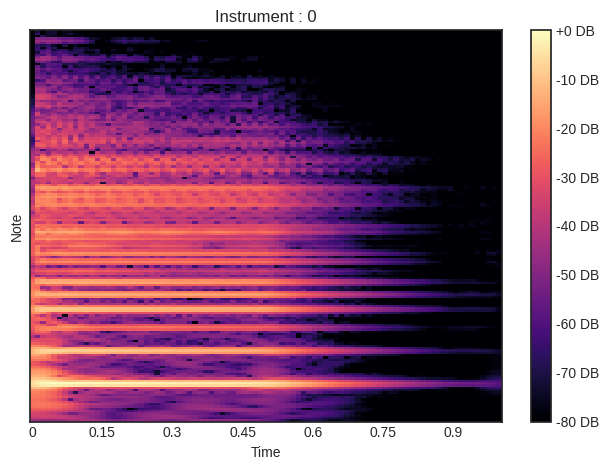

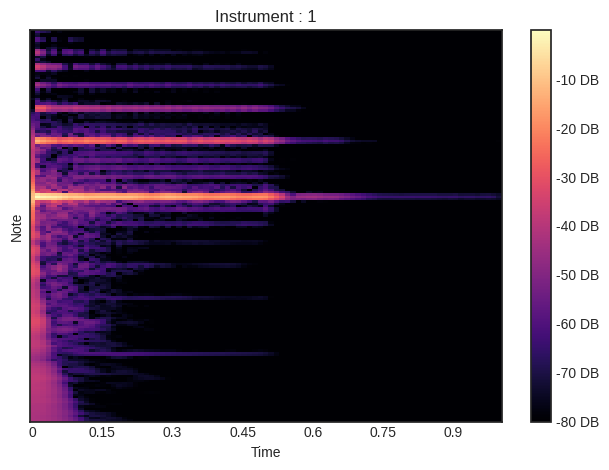

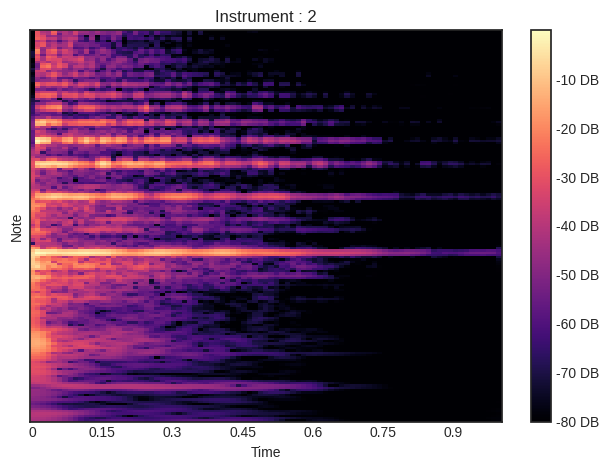

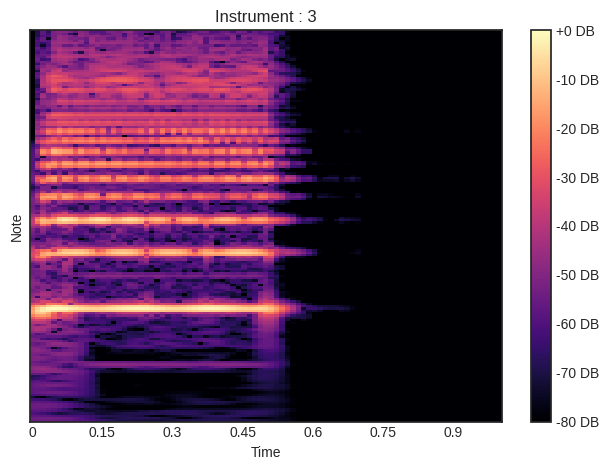

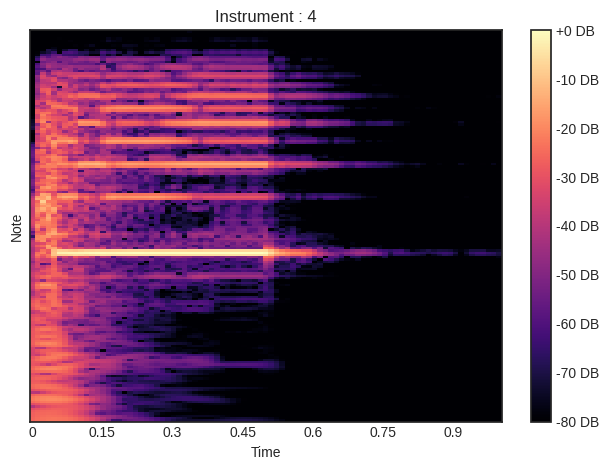

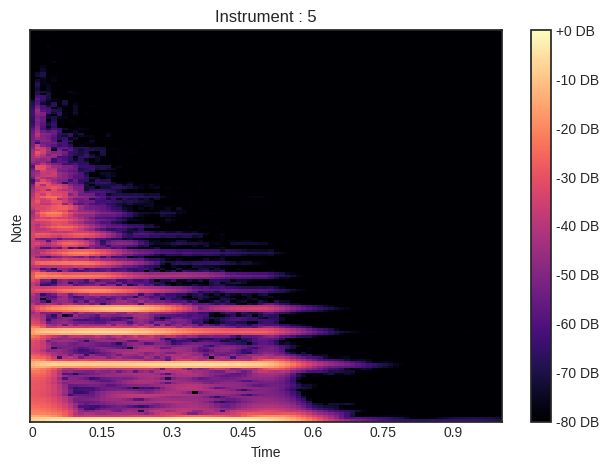

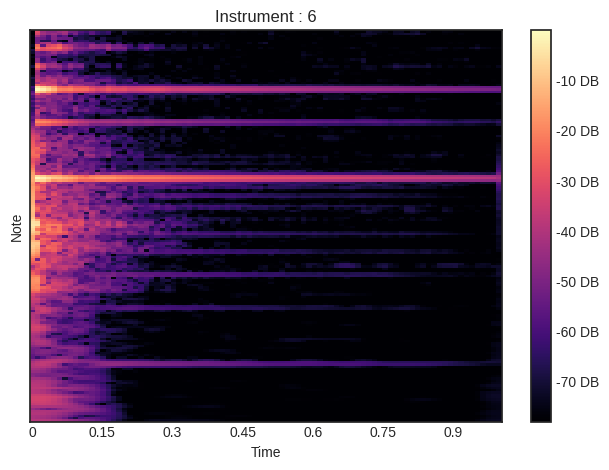

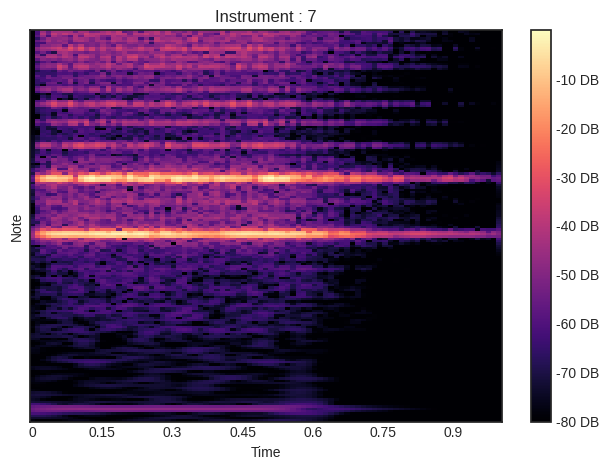

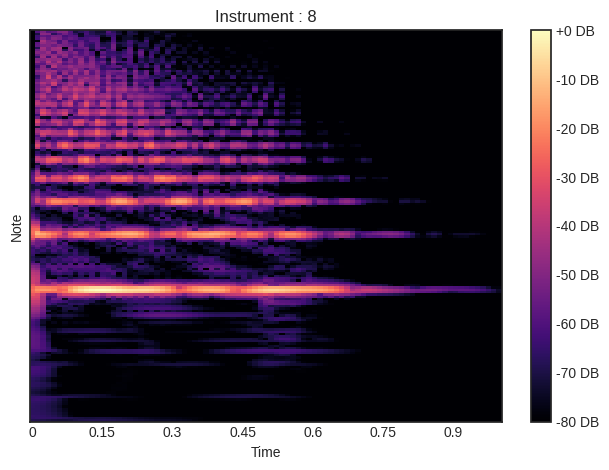

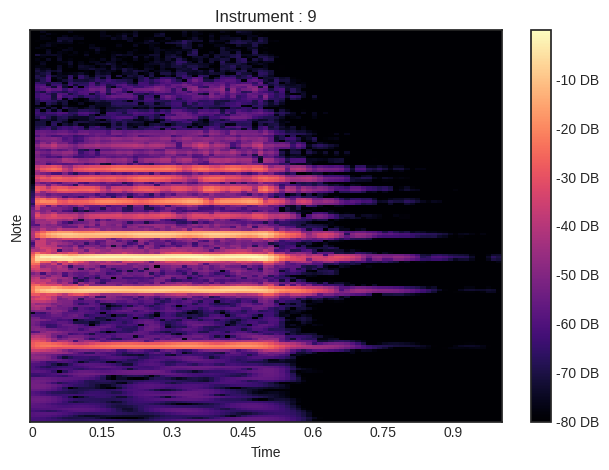

In [20]:
for i in range(0,len(instruments)*num_notes,num_notes):
    amp_db = librosa.amplitude_to_db(np.abs(audio_cqt[i]),ref=np.max)
    librosa.display.specshow(amp_db,sr=sr,x_axis='time',y_axis='cqt_note')
    plt.colorbar(format='%+2.0f DB')
    plt.title('Instrument : {}'.format(inst[i]))
    plt.tight_layout()
    plt.show()

* 훈련 데이터와 실험 데이터를 분리

In [21]:
cqt_np = np.array(audio_cqt,np.float32)
inst_np = np.array(inst,np.int16)

print(cqt_np.shape,inst_np.shape)

(500, 168, 87) (500,)




*   분류기에서 사용하기 위해 3차원 벡터를 2차원 벡터로 변환



In [22]:
cqt_np = cqt_np.reshape((500,168*87))



*   읽어온 데이터는 음량이나 범위가 다를 수 있음
*   min-max scaling을 통해 데이터의 범위를 조정함



In [23]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(cqt_np)

MinMaxScaler()

* 학습 데이터와 실험 데이터를 분리

In [24]:
from sklearn.model_selection import train_test_split

train_x,test_x,train_y,test_y = train_test_split(cqt_np,inst_np,test_size=0.2)

print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(400, 14616)
(100, 14616)
(400,)
(100,)


### Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

LR = LogisticRegression()
LR.fit(train_x,train_y)
pred = LR.predict(test_x)
acc = accuracy_score(pred,test_y)
print(acc) # 34%의 accuracy => 유튜브에는 0.31이 나옴

0.31


### Support Vector Machine

In [26]:
from sklearn import svm

SVM = svm.SVC(kernel='linear')
SVM.fit(train_x,train_y)
pred = SVM.predict(test_x)
acc = accuracy_score(pred,test_y)
print(acc) # 34%의 accuracy => 유튜브에는 0.33이 나옴

0.33


### Decision Tree

In [27]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(train_x,train_y)
pred = DT.predict(test_x)
acc = accuracy_score(pred,test_y)
print(acc) # 7%의 accuracy => 유튜브에는 0.58이 나옴


0.66


## Constant-Q 특징을 이용한 딥러닝 오디오 분류

* 오디오 데이터를 spectrogram으로 가공하면 파장과 세기를 가진 이미지(2차원 배열)가 생성
* 이 spectrogram을 CNN 이미지 분류를 통해 각 악기 소리를 분류

### DNN 모델 구성

In [28]:
from keras.utils import to_categorical

cqt_np = np.array(audio_cqt,np.float32)
cqt_np = cqt_np.reshape((500,168*87))
cqt_array = np.expand_dims(cqt_np,-1)
inst_cat = to_categorical(inst_np)

train_x,test_x,train_y,test_y = train_test_split(cqt_array,inst_cat,test_size=0.2)

print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(400, 14616, 1)
(100, 14616, 1)
(400, 10)
(100, 10)


In [29]:
from keras.models import Sequential,Model
from keras.layers import Input, Dense

def model_build():
    model = Sequential()
    
    input = Input(shape=(14616,),name='input')
    output = Dense(512,activation='relu',name='hidden1')(input)
    output = Dense(256,activation='relu',name='hidden2')(output)
    output = Dense(128,activation='relu',name='hidden3')(output)
    output = Dense(10,activation='relu',name='hidden4')(output)
    
    model = Model(inputs=[input],outputs=output)
    
    model.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['acc'])
    return model

In [30]:
model = model_build()
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 14616)]           0         
                                                                 
 hidden1 (Dense)             (None, 512)               7483904   
                                                                 
 hidden2 (Dense)             (None, 256)               131328    
                                                                 
 hidden3 (Dense)             (None, 128)               32896     
                                                                 
 hidden4 (Dense)             (None, 10)                1290      
                                                                 
Total params: 7,649,418
Trainable params: 7,649,418
Non-trainable params: 0
_________________________________________________________________


In [31]:
history = model.fit(train_x,train_y,epochs=30,batch_size=128,validation_split=0.2)

Epoch 1/30
3/3 [==============================] - 7s 117ms/step - loss: 6.3473 - acc: 0.1406 - val_loss: 4.1618 - val_acc: 0.2250
Epoch 2/30
3/3 [==============================] - 0s 22ms/step - loss: 3.2811 - acc: 0.3875 - val_loss: 3.4061 - val_acc: 0.2250
Epoch 3/30
3/3 [==============================] - 0s 22ms/step - loss: 3.0658 - acc: 0.4500 - val_loss: 3.3350 - val_acc: 0.2750
Epoch 4/30
3/3 [==============================] - 0s 21ms/step - loss: 2.9446 - acc: 0.5437 - val_loss: 3.2499 - val_acc: 0.2625
Epoch 5/30
3/3 [==============================] - 0s 22ms/step - loss: 2.7737 - acc: 0.5938 - val_loss: 3.1839 - val_acc: 0.2625
Epoch 6/30
3/3 [==============================] - 0s 22ms/step - loss: 2.5800 - acc: 0.6562 - val_loss: 3.3734 - val_acc: 0.2500
Epoch 7/30
3/3 [==============================] - 0s 20ms/step - loss: 2.2244 - acc: 0.6875 - val_loss: 4.6067 - val_acc: 0.2750
Epoch 8/30
3/3 [==============================] - 0s 20ms/step - loss: 1.2058 - acc: 0.7125 - va

In [32]:
def plot_history(history_dict):
    loss = history_dict['loss']
    val_loss = history_dict['val_loss']
    
    epochs = range(1,len(loss)+1)
    fig = plt.figure(figsize=(14,5))
    
    ax1 = fig.add_subplot(1,2,1)
    ax1.plot(epochs,loss,'b--',label='train_loss')
    ax1.plot(epochs,val_loss,'r:',label='val_loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.grid()
    ax1.legend()
    
    acc = history_dict['acc']
    val_acc = history_dict['val_acc']
    
    ax2 = fig.add_subplot(1,2,2)
    ax2.plot(epochs,loss,'b--',label='train_accuracy')
    ax2.plot(epochs,val_loss,'r:',label='val_accuracy')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('acc')
    ax2.grid()
    ax2.legend()
    
    plt.show()

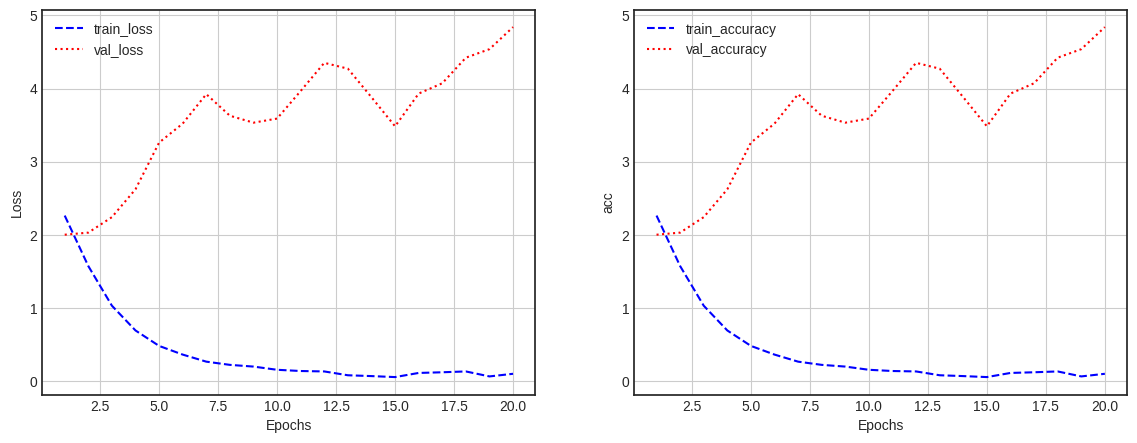

In [39]:
plot_history(history.history)

In [42]:
model.evaluate(test_x,test_y)

4/4 [==============================] - 0s 9ms/step - loss: 4.2312 - acc: 0.5600


[4.231195449829102, 0.5600000023841858]

### CNN 모델 구성



*   spectrogram을 분류할 CNN 모델 구성
*   모델의 구성은 여타 이미지 분류 모델과 다르지 않음
*   spectrogram은 1차원 이미지로 간주


In [44]:
from keras.utils import to_categorical

cqt_np = np.array(audio_cqt,np.float32)
cqt_array = np.expand_dims(cqt_np,-1)
inst_cat = to_categorical(inst_np)

train_x,test_x,train_y,test_y = train_test_split(cqt_array,inst_cat,test_size=0.2)

print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(400, 168, 87, 1)
(100, 168, 87, 1)
(400, 10)
(100, 10)


In [45]:
from keras.layers import Conv2D, MaxPool2D, Flatten
def model_build():
    model = Sequential()
    
    input = Input(shape=(168,87,1))
    
    output = Conv2D(128,3,strides=1,padding='same',activation='relu')(input)
    output = MaxPool2D(pool_size=(2,2),strides=2,padding='same')(output)
    
    output = Conv2D(256,3,strides=1,padding='same',activation='relu')(input)
    output = MaxPool2D(pool_size=(2,2),strides=2,padding='same')(output)
    
    output = Conv2D(512,3,strides=1,padding='same',activation='relu')(input)
    output = MaxPool2D(pool_size=(2,2),strides=2,padding='same')(output)
    
    output = Flatten()(output)
    output = Dense(512,activation='relu')(output)
    output = Dense(256,activation='relu')(output)
    output = Dense(128,activation='relu')(output)
    
    output = Dense(10,activation='softmax')(output)
    
    model = Model(inputs=[input],outputs=output)
    
    model.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['acc'])
    
    return model
    

In [46]:
model = model_build()
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 168, 87, 1)]      0         
                                                                 
 conv2d_5 (Conv2D)           (None, 168, 87, 512)      5120      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 84, 44, 512)      0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1892352)           0         
                                                                 
 dense_4 (Dense)             (None, 512)               968884736 
                                                                 
 dense_5 (Dense)             (None, 256)               131328    
                                                           

In [47]:
history = model.fit(train_x, train_y, epochs = 20, batch_size=128,validation_split=0.2)

Epoch 1/20
3/3 [==============================] - 2s 168ms/step - loss: 2.2916 - acc: 0.1250 - val_loss: 2.2455 - val_acc: 0.1500
Epoch 2/20
3/3 [==============================] - 0s 87ms/step - loss: 1.7087 - acc: 0.4094 - val_loss: 2.1846 - val_acc: 0.2625
Epoch 3/20
3/3 [==============================] - 0s 88ms/step - loss: 1.1405 - acc: 0.5969 - val_loss: 2.5624 - val_acc: 0.2625
Epoch 4/20
3/3 [==============================] - 0s 87ms/step - loss: 0.7463 - acc: 0.7406 - val_loss: 2.7338 - val_acc: 0.3625
Epoch 5/20
3/3 [==============================] - 0s 87ms/step - loss: 0.5036 - acc: 0.8406 - val_loss: 3.0570 - val_acc: 0.3000
Epoch 6/20
3/3 [==============================] - 0s 89ms/step - loss: 0.4020 - acc: 0.8375 - val_loss: 3.7158 - val_acc: 0.4125
Epoch 7/20
3/3 [==============================] - 0s 88ms/step - loss: 0.3023 - acc: 0.8969 - val_loss: 3.5543 - val_acc: 0.4625
Epoch 8/20
3/3 [==============================] - 0s 87ms/step - loss: 0.1861 - acc: 0.9406 - va

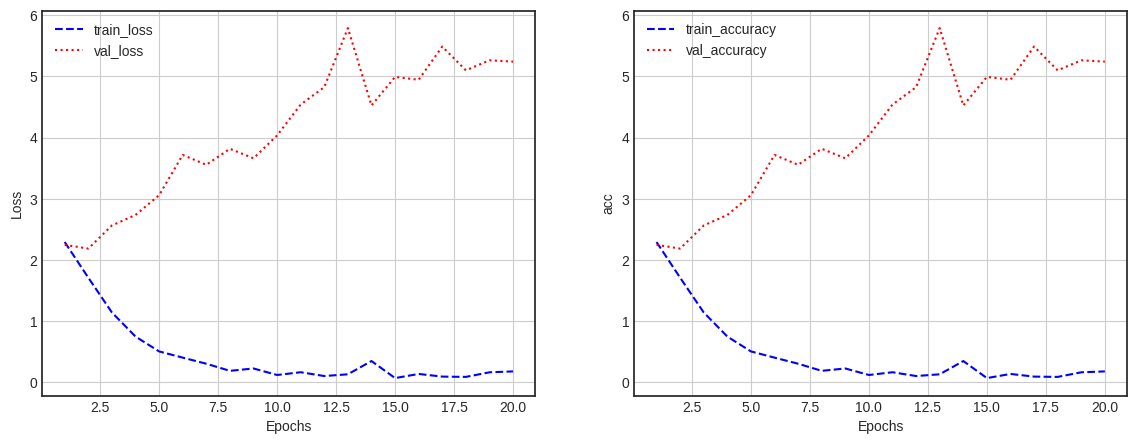

In [48]:
plot_history(history.history)



*   훈련한 모델에 대한 정확도 평가
*   앞선 일반 분류 방법보다 정확도가 많이 오른 것을 확인할 수 있음



In [49]:
model.evaluate(test_x,test_y)

4/4 [==============================] - 0s 9ms/step - loss: 4.6746 - acc: 0.5200


[4.674623012542725, 0.5199999809265137]

## MFCC를 이용한 머신러닝 오디오 분류

### 데이터 준비

* 데이터를 불러오고 MFCC(Mel-frequency cepstral coefficients)를 사용해 melspectrogram으로 변환

In [50]:
audio_mfcc = []
for y in audio:
    ret = librosa.feature.mfcc(y=y,sr=sr)
    audio_mfcc.append(ret)

<ipython-input-51-e54f49cfd073>:6: UserWarning: Glyph 9839 (\N{MUSIC SHARP SIGN}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9839 (\N{MUSIC SHARP SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


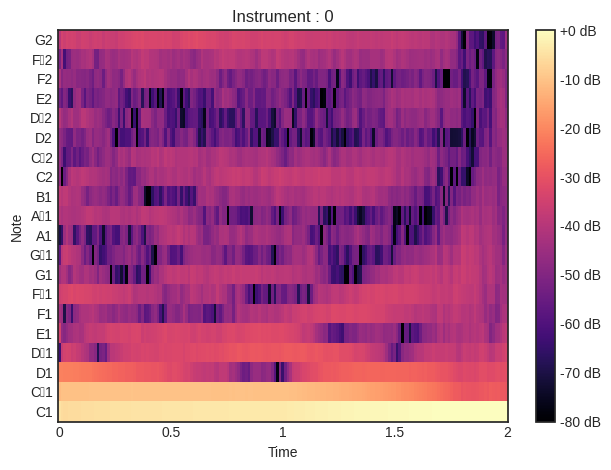

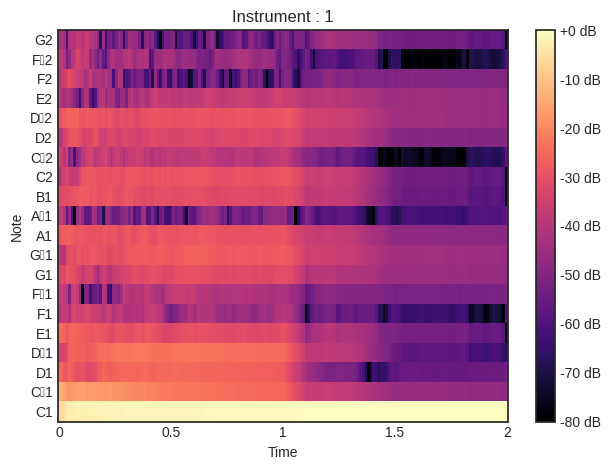

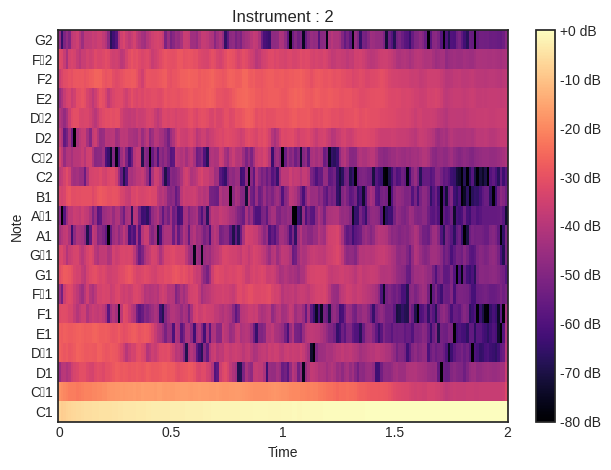

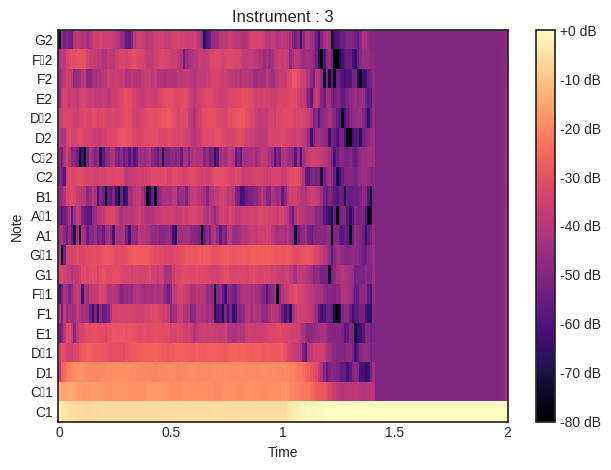

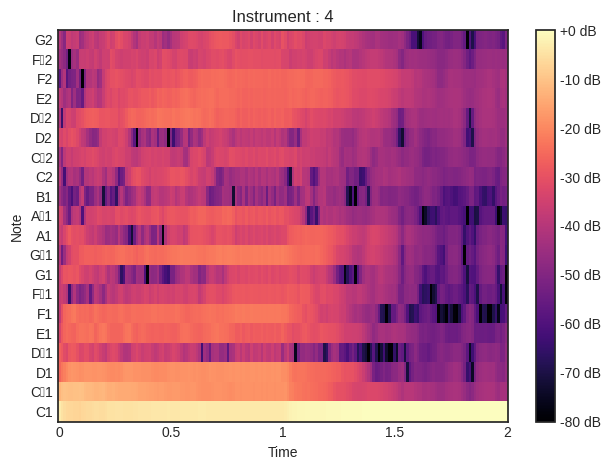

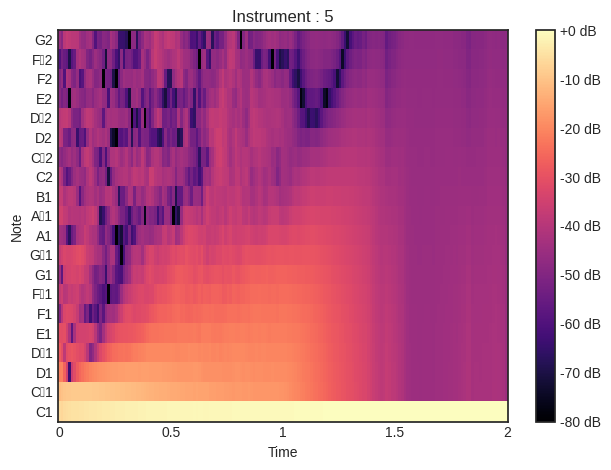

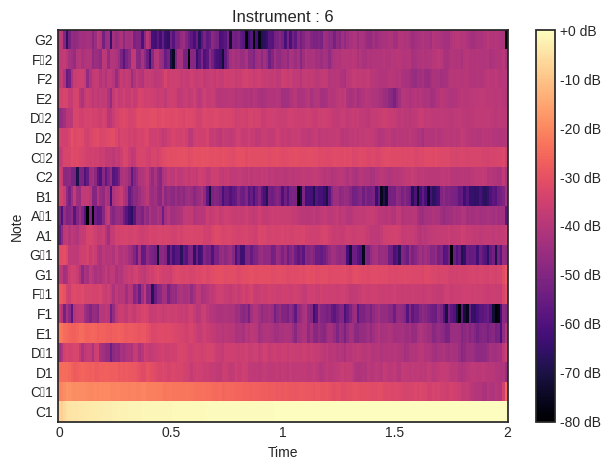

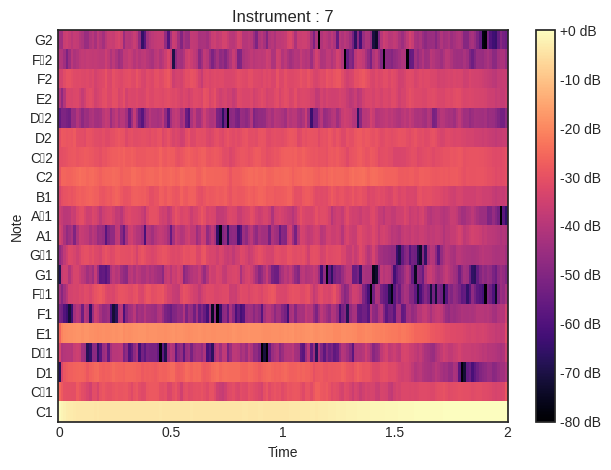

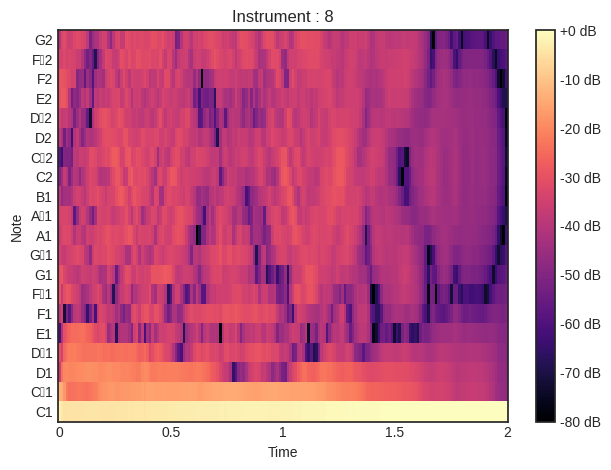

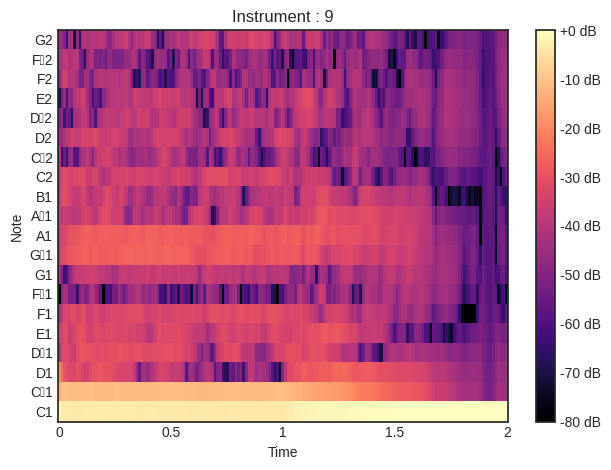

In [51]:
for i in range(0, len(instruments)*num_notes,num_notes):
    amp_db = librosa.amplitude_to_db(np.abs(audio_mfcc[i]),ref=np.max)
    librosa.display.specshow(amp_db,sr=sr,x_axis='time',y_axis='cqt_note')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Instrument : {}'.format(inst[i]))
    plt.tight_layout()
    plt.show()

In [52]:
mfcc_np = np.array(audio_mfcc,np.float32)
inst_np = np.array(inst, np.int16)

print(mfcc_np.shape, inst_np.shape)

(500, 20, 173) (500,)




*   분류기에서 사용하기 위해 3차원 벡터를 2차원 벡터로 변환



In [53]:
mfcc_np = mfcc_np.reshape((500,20*173))



*   읽어온 데이터는 음량이나 범위가 다를 수 있음
*   min-max scaling을 통해 데이터의 범위를 조정함



In [54]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(mfcc_np)

MinMaxScaler()

* 학습 데이터와 실험 데이터를 분리

In [55]:
from sklearn.model_selection import train_test_split

train_x,test_x,train_y,test_y = train_test_split(mfcc_np,inst_np,test_size=0.2)

print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(400, 3460)
(100, 3460)
(400,)
(100,)


### Logistic Regression

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

LR = LogisticRegression()
LR.fit(train_x,train_y)
pred = LR.predict(test_x)
acc = accuracy_score(pred,test_y)
print(acc)

0.93


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Support Vector Machine

In [57]:
from sklearn import svm

SVM = svm.SVC(kernel='linear')
SVM.fit(train_x,train_y)
pred = SVM.predict(test_x)
acc = accuracy_score(pred,test_y)
print(acc) 

0.97


### Decision Tree

In [58]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(train_x,train_y)
pred = DT.predict(test_x)
acc = accuracy_score(pred,test_y)
print(acc)


0.79


## MFCC를 이용한 딥러닝 오디오 분류

* 앞선 문제점을 극복하기 위해 오디오 데이터에 특화된 분류 방법 필요
* 오디오 데이터를 spectrogram으로 가공하면 파장과 세기를 가진 이미지(2차원 배열)가 생성
* 이 spectrogram을 CNN 이미지 분류를 통해 각 악기 소리를 분류

### DNN 모델 구성   
1:02:34

### DNN 모델 구성

In [59]:
from keras.utils import to_categorical

mfcc_np = np.array(audio_mfcc, np.float32)
mfcc_np = mfcc_np.reshape((500,20 * 173))
mfcc_array = np.expand_dims(mfcc_np, -1)
inst_cat = to_categorical(inst_np)

train_x,test_x,train_y,test_y = train_test_split(mfcc_array,inst_cat,test_size=0.2)

print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(400, 3460, 1)
(100, 3460, 1)
(400, 10)
(100, 10)


In [60]:
from keras.models import Sequential,Model
from keras.layers import Input, Dense

def model_build():
    model = Sequential()
    
    input = Input(shape=(3460,),name='input')
    output = Dense(512,activation='relu',name='hidden1')(input)
    output = Dense(256,activation='relu',name='hidden2')(output)
    output = Dense(128,activation='relu',name='hidden3')(output)
    output = Dense(10,activation='relu',name='hidden4')(output)
    
    model = Model(inputs=[input],outputs=output)
    
    model.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['acc'])
    return model

In [61]:
model = model_build()
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 3460)]            0         
                                                                 
 hidden1 (Dense)             (None, 512)               1772032   
                                                                 
 hidden2 (Dense)             (None, 256)               131328    
                                                                 
 hidden3 (Dense)             (None, 128)               32896     
                                                                 
 hidden4 (Dense)             (None, 10)                1290      
                                                                 
Total params: 1,937,546
Trainable params: 1,937,546
Non-trainable params: 0
_________________________________________________________________


In [62]:
history = model.fit(train_x,train_y,epochs=30,batch_size=128,validation_split=0.2)

Epoch 1/30
3/3 [==============================] - 2s 90ms/step - loss: 7.4660 - acc: 0.0906 - val_loss: 7.3462 - val_acc: 0.1625
Epoch 2/30
3/3 [==============================] - 0s 18ms/step - loss: 7.6011 - acc: 0.1437 - val_loss: 7.2408 - val_acc: 0.0750
Epoch 3/30
3/3 [==============================] - 0s 17ms/step - loss: 7.5511 - acc: 0.0969 - val_loss: 7.1874 - val_acc: 0.0750
Epoch 4/30
3/3 [==============================] - 0s 17ms/step - loss: 7.5335 - acc: 0.0969 - val_loss: 7.1577 - val_acc: 0.0750
Epoch 5/30
3/3 [==============================] - 0s 18ms/step - loss: 7.5191 - acc: 0.0969 - val_loss: 7.1351 - val_acc: 0.0750
Epoch 6/30
3/3 [==============================] - 0s 17ms/step - loss: 7.5102 - acc: 0.1000 - val_loss: 7.1137 - val_acc: 0.1375
Epoch 7/30
3/3 [==============================] - 0s 17ms/step - loss: 7.5006 - acc: 0.1906 - val_loss: 7.0966 - val_acc: 0.2125
Epoch 8/30
3/3 [==============================] - 0s 18ms/step - loss: 7.4886 - acc: 0.2656 - val

In [67]:
def plot_history(history_dict):
    loss = history_dict['loss']
    val_loss = history_dict['val_loss']
    
    epochs = range(1,len(loss)+1)
    fig = plt.figure(figsize=(14,5))
    
    ax1 = fig.add_subplot(1,2,1)
    ax1.plot(epochs,loss,'b--',label='train_loss')
    ax1.plot(epochs,val_loss,'r:',label='val_loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.grid()
    ax1.legend()
    
    acc = history_dict['acc']
    val_acc = history_dict['val_acc']
    
    ax2 = fig.add_subplot(1,2,2)
    ax2.plot(epochs,loss,'b--',label='train_accuracy')
    ax2.plot(epochs,val_loss,'r:',label='val_accuracy')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('acc')
    ax2.grid()
    ax2.legend()
    
    plt.show()

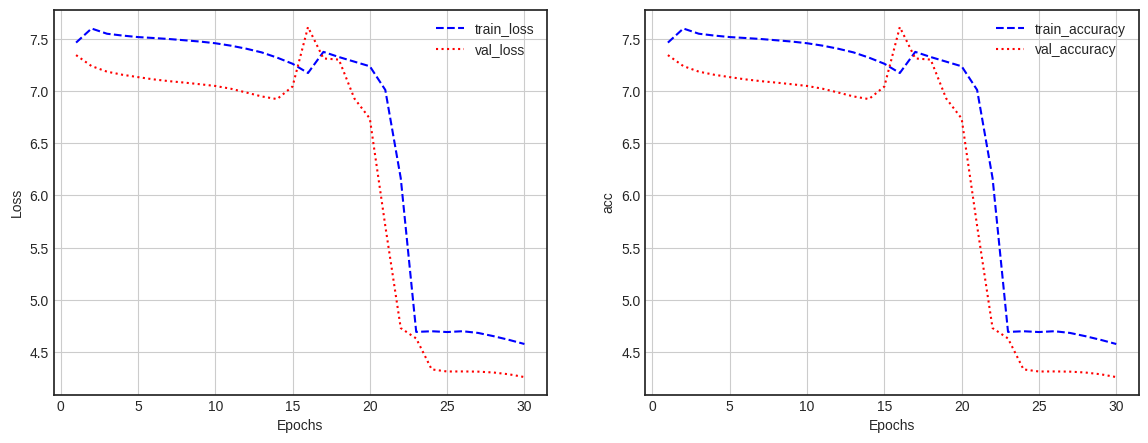

In [68]:
plot_history(history.history)

In [66]:
model.evaluate(test_x,test_y)

4/4 [==============================] - 0s 3ms/step - loss: 5.0689 - acc: 0.3200


[5.068851470947266, 0.3199999928474426]

### CNN 모델 구성



*   spectrogram을 분류할 CNN 모델 구성
*   모델의 구성은 여타 이미지 분류 모델과 다르지 않음
*   spectrogram은 1차원 이미지로 간주


In [69]:
from keras.utils import to_categorical

mfcc_np = np.array(audio_mfcc, np.float32)
mfcc_array = np.expand_dims(mfcc_np,-1)
inst_cat = to_categorical(inst_np)

train_x,test_x,train_y,test_y = train_test_split(mfcc_array,inst_cat,test_size=0.2)

print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(400, 20, 173, 1)
(100, 20, 173, 1)
(400, 10)
(100, 10)


In [70]:
from keras.layers import Conv2D, MaxPool2D, Flatten
def model_build():
    model = Sequential()
    
    input = Input(shape=(20 , 173, 1))
    
    output = Conv2D(128,3,strides=1,padding='same',activation='relu')(input)
    output = MaxPool2D(pool_size=(2,2),strides=2,padding='same')(output)
    
    output = Conv2D(256,3,strides=1,padding='same',activation='relu')(input)
    output = MaxPool2D(pool_size=(2,2),strides=2,padding='same')(output)
    
    output = Conv2D(512,3,strides=1,padding='same',activation='relu')(input)
    output = MaxPool2D(pool_size=(2,2),strides=2,padding='same')(output)
    
    output = Flatten()(output)
    output = Dense(512,activation='relu')(output)
    output = Dense(256,activation='relu')(output)
    output = Dense(128,activation='relu')(output)
    
    output = Dense(10,activation='softmax')(output)
    
    model = Model(inputs=[input],outputs=output)
    
    model.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['acc'])
    
    return model
    

In [71]:
model = model_build()
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 20, 173, 1)]      0         
                                                                 
 conv2d_8 (Conv2D)           (None, 20, 173, 512)      5120      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 10, 87, 512)      0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 445440)            0         
                                                                 
 dense_8 (Dense)             (None, 512)               228065792 
                                                                 
 dense_9 (Dense)             (None, 256)               131328    
                                                           

In [72]:
history = model.fit(train_x, train_y, epochs = 20, batch_size=128,validation_split=0.2)

Epoch 1/20
3/3 [==============================] - 3s 221ms/step - loss: 746.2303 - acc: 0.1156 - val_loss: 1144.2842 - val_acc: 0.1500
Epoch 2/20
3/3 [==============================] - 0s 35ms/step - loss: 1170.4851 - acc: 0.1281 - val_loss: 845.7662 - val_acc: 0.1125
Epoch 3/20
3/3 [==============================] - 0s 35ms/step - loss: 803.6891 - acc: 0.0875 - val_loss: 573.0862 - val_acc: 0.2500
Epoch 4/20
3/3 [==============================] - 0s 36ms/step - loss: 441.3946 - acc: 0.1813 - val_loss: 435.2921 - val_acc: 0.1375
Epoch 5/20
3/3 [==============================] - 0s 34ms/step - loss: 301.2342 - acc: 0.1500 - val_loss: 200.0750 - val_acc: 0.2125
Epoch 6/20
3/3 [==============================] - 0s 33ms/step - loss: 118.9278 - acc: 0.2656 - val_loss: 74.9665 - val_acc: 0.3250
Epoch 7/20
3/3 [==============================] - 0s 34ms/step - loss: 55.9855 - acc: 0.2562 - val_loss: 39.6314 - val_acc: 0.2750
Epoch 8/20
3/3 [==============================] - 0s 34ms/step - loss

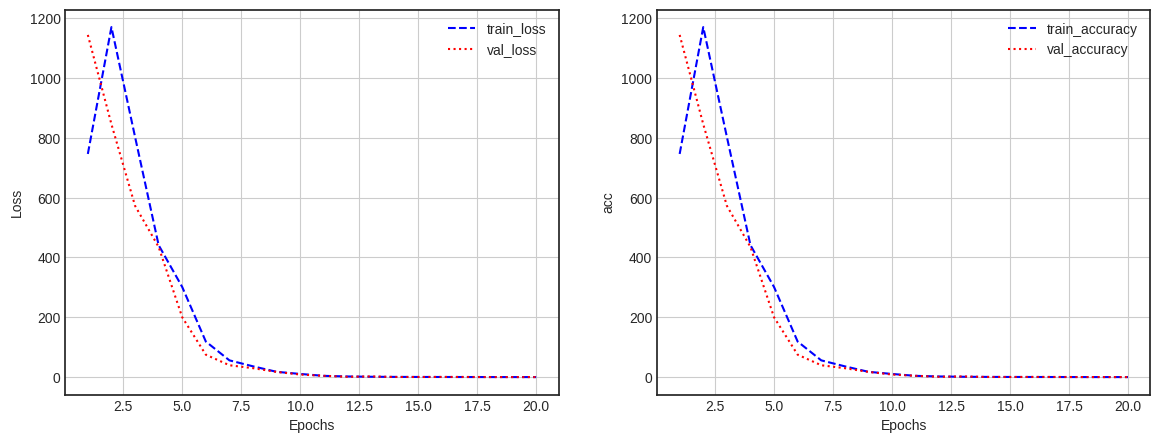

In [73]:
plot_history(history.history)



*   훈련한 모델에 대한 정확도 평가
*   앞선 일반 분류 방법보다 정확도가 많이 오른 것을 확인할 수 있음



In [74]:
model.evaluate(test_x,test_y)

4/4 [==============================] - 0s 15ms/step - loss: 0.5178 - acc: 0.9300


[0.5177686214447021, 0.9300000071525574]